In [1]:
from IPython.display import Image
%matplotlib inline

In [2]:
# 各種import
import numpy as np  
import pandas as pd  
from pandas import DataFrame, Series  
from sklearn.datasets import make_blobs  
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

## 人工データ作成

In [3]:
# 分布作成
X, y = make_blobs(  
    n_samples=1000,  # サンプル数
    n_features=2,    # 各サンプルの説明変数の数
    centers=4,       # 離散データのグループ数
    cluster_std=1.5, # 離散データのバラけ具合
    random_state=4)  # 呼ぶたびにseedを変えずに固定

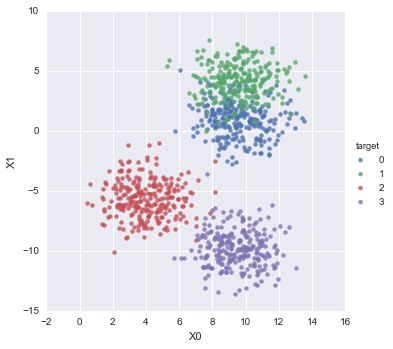

In [4]:
# dataframeに格納し、データ点をplot
dfn = pd.concat([DataFrame(X, columns=["X0","X1"]),DataFrame(y, columns=["target",])], axis=1)
sns.lmplot("X0","X1",data=dfn,hue="target",fit_reg=False) 

## Logistic Regressionに対する予測境界の可視化

In [5]:
# データから予測器を作成
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X, y)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [6]:
# メッシュを作成するための準備として、２次元の空間で、最大値・最小値や、メッシュの幅を定義
x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
step = 0.04  # step size for mesh

In [7]:
# メッシュ作成
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [8]:
# メッシュの各点に対し、ラベル付けをする
mesh_predict = lr.predict(np.c_[xx.ravel(), yy.ravel()])
mesh_predict_reshape = mesh_predict.reshape(xx.shape)

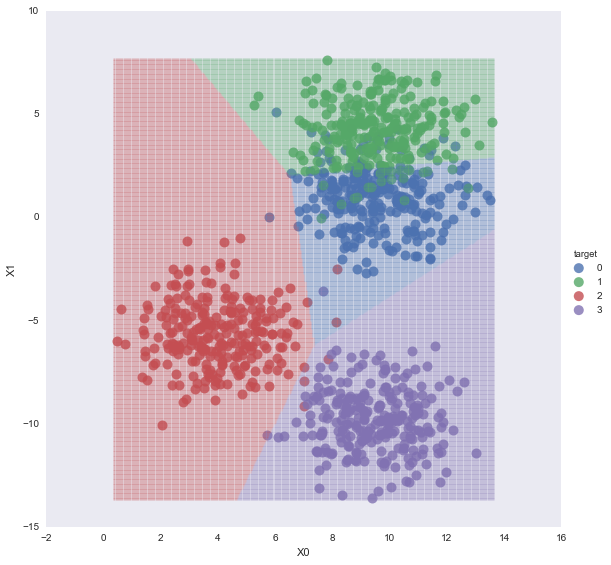

In [9]:
sns.lmplot("X0", "X1", data=dfn, hue="target", fit_reg=False, size=8,  scatter_kws={"marker": "D", "s": 100})  
sns.plt.pcolormesh(xx, yy, mesh_predict_reshape, alpha=0.1,cmap=ListedColormap(sns.color_palette()[:4]))  
sns.plt.show()  

## Gradient Boosting Decidion Tree

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,max_depth=1)
gbdt.fit(X, y)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=1, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [11]:
# メッシュの各点に対し、ラベル付けをする
mesh_predict_reshape_gbdt = gbdt.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

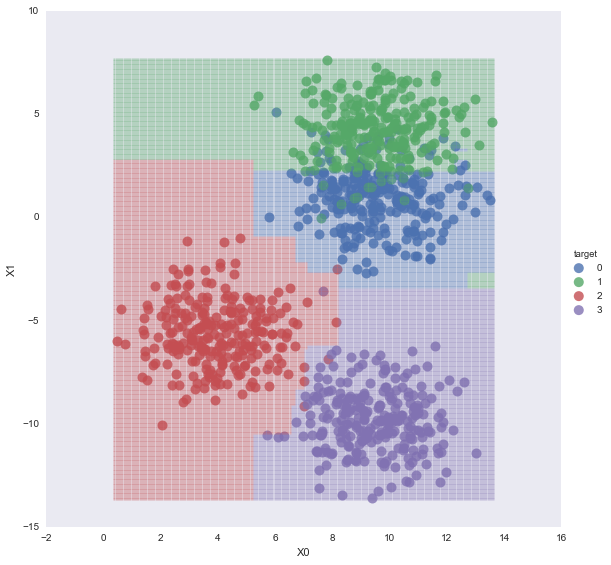

In [12]:
sns.lmplot("X0", "X1", data=dfn, hue="target", fit_reg=False, size=8,  scatter_kws={"marker": "D", "s": 100})  
sns.plt.pcolormesh(xx, yy, mesh_predict_reshape_gbdt, alpha=0.1,cmap=ListedColormap(sns.color_palette()[:4]))  
sns.plt.show()  

In [13]:
## 参考資料
- 
- 
- 
- 

SyntaxError: invalid syntax (<ipython-input-13-f8bc2df380cd>, line 2)